<a href="https://colab.research.google.com/github/Cameron-Grey-Kunstadt/Cancer-Research/blob/main/Gd_Concentration_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code is designed to read in a Tiff MRI image of a mouse, and given a selected ROI, calculate the amount of Gadolinium that would exist in that area of the mouse, based on the saturation of pixels. 
# The equations used can be found in this paper by Morkenberg et al. http://pfeifer.phas.ubc.ca/refbase/files/Morkenborg-MRM-2003-21-637.pdf

from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# This function measures the saturation values of the given ROI of the given Image.
def measure(img, ROI):
  
  x1, x2, y1, y2 = ROI
  ROI = img[x1:x2, y1:y2]
  print('the mean value is ' + str(ROI.mean()))
  print('the max value is ' + str(ROI.max()))
  print('the min value is ' + str(ROI.min()))
  print('the size is ' + str(ROI.shape))
  print('the stdev value is ' + str(ROI.std()))

In [ ]:
# This function displays the given images and ROIs
def display(img, ROI):
  x1, x2, y1, y2 = ROI
  plt.imshow(img, cmap='gray')
  plt.gca().add_patch(Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))
  plt.axis('off')

In [ ]:
# This function displays the given images and ROIs
def display_multiple(img_stack, ROI, slice_num):
  #E2_image_stack,ROI, slice_num
  x1, x2, y1, y2 = ROI

  fig = plt.figure(figsize=(15, 10))
  for i in range (0, 6):
    temp_img = img_stack[:,:,slice_num,i]
    ROI = temp_img[x1:x2, y1:y2]
    #signal_values.append(ROI.mean())
    plt.subplot(2, 3, i+1)
    plt.imshow(temp_img, cmap='gray')
    plt.gca().add_patch(Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))
    plt.axis('off')

In [ ]:
# This function calculates the T1 value, which is a specific Time after the gadolidium injection, this is found by fitting to a curve of the given TR values, that are known. 
# Basically we are searching for a specific time where the gadolidium has decayed the ideal amount
def T1value(img_stack, ROI, slice_num):

  x1, x2, y1, y2 = ROI

  signal_values = []
  
  TR_values = [4000,3000,1500,800,600,478]
                           
  #find the mean for each TR(index) value

  for i in range (0, 6):
    a = img_stack[:,:,slice_num,i]
    ROI = a[x1:x2, y1:y2]
    signal_values.append(ROI.mean())
  
  print('Signal values: ', signal_values)
  print('TR values: ', TR_values)
  
  popt = T1_fit(TR_values, signal_values)
  return popt
                             
                             


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# This function is continuing the curve fitting, and plotting all of the desired data
def T1_fit(TR_values, signal_values):
  
 
  xData = np.array(TR_values)
  yData = np.array(signal_values)
  
  #Fitting function
  def func(x, S0, T1):
    return S0*(1-np.exp(-x/T1))

  #Experimental x and y data points
  fig = plt.figure()
  ax = plt.axes()

  #Plot experimental data points
  ax.plot(xData, yData, 'bo', label='experimental-data')

  #Initial guess for the parameters
  initialGuess = [500, 500]

  #Perform the curve-fit
  popt, pcov = curve_fit(func, xData, yData, initialGuess)

  
  #X values for the fitted function
  xFit = np.arange(0.0, 10000, 5)

  #Plot the fitted function
  ax.plot(xFit, func(xFit, *popt), 'r', label='fit params: S0=%5.3f, T1=%5.3f' % tuple(popt))
  #print('popt inside ',popt)

  plt.xlabel('Milliseconds')
  plt.ylabel('Signal')
  ax.legend()
  plt.axis([400,10000, 0, 15000])
  return popt
  

In [ ]:
def gd_concentration_calc(a, b):
  return (((1/b)-(1/a))/3.1)*1000

In [ ]:
ls '/content/drive/My Drive/Colab Notebooks/nifti_data/'

G3M1_fid-T1map_RARE_E2.hdr  G3M2_fid-T1map_RARE_E4.hdr
G3M1_fid-T1map_RARE_E2.img  G3M2_fid-T1map_RARE_E4.img
G3M1_fid-T1map_RARE_E4.hdr  G3M3_fid-T1map_RARE_E2.hdr
G3M1_fid-T1map_RARE_E4.img  G3M3_fid-T1map_RARE_E2.img
G3M2_fid-T1map_RARE_E2.hdr  G3M3_fid-T1map_RARE_E4.hdr
G3M2_fid-T1map_RARE_E2.img  G3M3_fid-T1map_RARE_E4.img


Signal values:  [8291.06, 7698.84, 4851.706666666667, 3875.2533333333336, 3283.48, 2374.3866666666668]
TR values:  [4000, 3000, 1500, 800, 600, 478]
Signal values:  [8837.74, 8714.24, 6374.613333333334, 5373.1866666666665, 4166.426666666666, 4165.433333333333]
TR values:  [4000, 3000, 1500, 800, 600, 478]
Concentration at slice 5 is: 0.14647772840787535


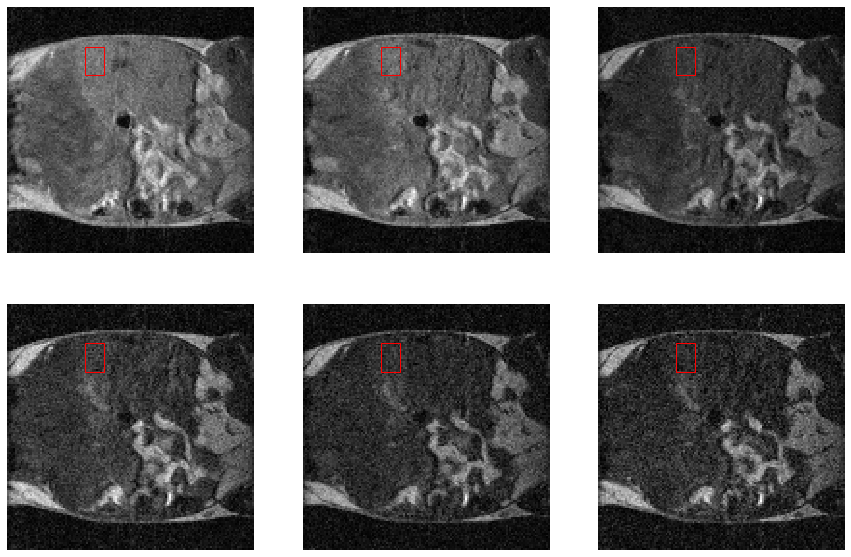

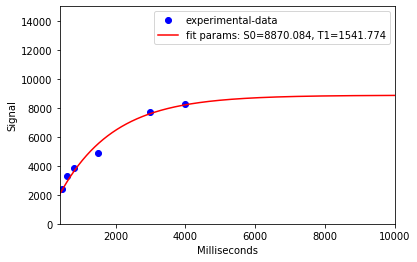

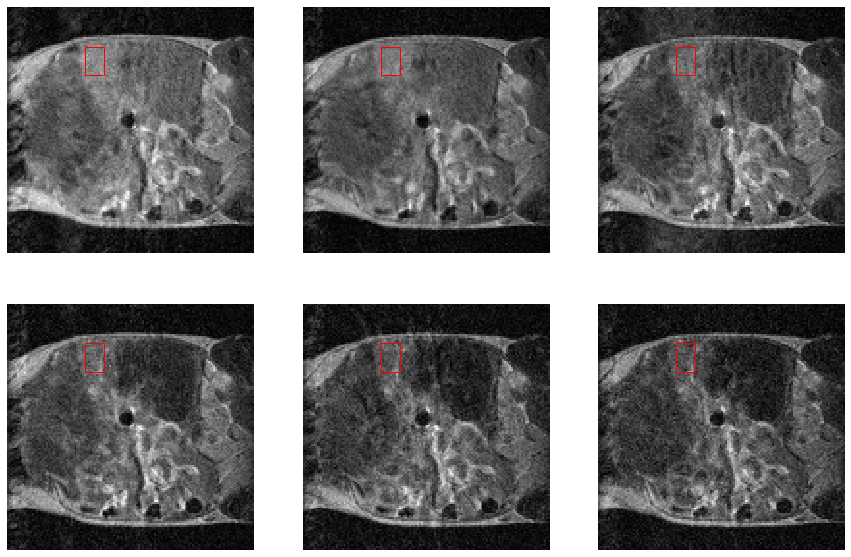

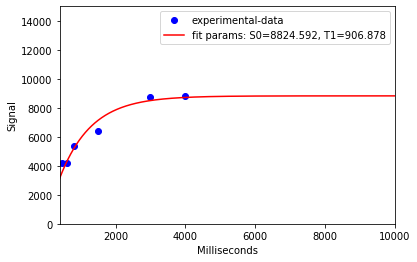

In [ ]:
#Image processing
import numpy as np
import numpy as np
import nibabel as nib

'''
#G3M1
E2 = "/content/drive/My Drive/Colab Notebooks/nifti_data/G3M1_fid-T1map_RARE_E2.img"
E4 = "/content/drive/My Drive/Colab Notebooks/nifti_data/G3M1_fid-T1map_RARE_E4.img"
ROI = [55, 70, 20, 40]; slice_num = 6 #Tumor
#ROI = [15, 25, 80, 90]; slice_num = 4 #Liver
'''
#G3M2
E2 = "/content/drive/My Drive/Colab Notebooks/nifti_data/G3M2_fid-T1map_RARE_E2.img"
E4 = "/content/drive/My Drive/Colab Notebooks/nifti_data/G3M2_fid-T1map_RARE_E4.img"
ROI = [40, 50, 20, 35]; slice_num = 5 #Tumor
#ROI = [10, 20, 40, 50]; slice_num = 6 #Liver
'''
#G3M3
E2 = "/content/drive/My Drive/Colab Notebooks/nifti_data/G3M3_fid-T1map_RARE_E2.img"
E4 = "/content/drive/My Drive/Colab Notebooks/nifti_data/G3M3_fid-T1map_RARE_E4.img"
#ROI = [70, 90, 18, 28]; slice_num = 7 #Tumor
ROI = [20, 25, 40, 60]; slice_num = 6 #Liver
'''

#Image analysis for Pre-Gd image
img1 = nib.load(E2)
E2_image_stack = np.array(img1.dataobj)
image_stack_pre = np.reshape(E2_image_stack, (128,128,20,6))
display_multiple(image_stack_pre,ROI, slice_num)
a = T1value(image_stack_pre,ROI, slice_num)

#Image analysis for post-Gd image
img2 = nib.load(E4)
E4_image_stack = np.array(img2.dataobj)
image_stack_post = np.reshape(E4_image_stack, (128,128,20,6))
display_multiple(image_stack_post,ROI, slice_num)
b = T1value(image_stack_post,ROI, slice_num)

gd_concentration = gd_concentration_calc(a[1],b[1])
print('Concentration at slice', slice_num, 'is:', gd_concentration)